In [1]:
import os

os.chdir("/workspaces/p99-bluesky/tests/")

import asyncio
import os

from bluesky.callbacks.best_effort import BestEffortCallback
from bluesky.run_engine import RunEngine
from ophyd.sim import noisy_det as det
from ophyd_async.core import DeviceCollector

from p99_bluesky.plans.stxm import stxm_fast, stxm_step

bec = BestEffortCallback()
RE = RunEngine({})
from databroker import Broker

db = Broker.named('temp')
RE.subscribe(db.insert)
from p99_bluesky.sim.sim_stages import SimThreeAxisStage

async with DeviceCollector():
        xyz_motor = SimThreeAxisStage(name="sim_motor", instant=False)


Deferred pause acknowledged. Continuing to checkpoint.


2024-07-23 12:44:33,647 - P99 - INFO - Check sim_motor-x limits.
2024-07-23 12:44:33,648 - P99 - INFO - Check sim_motor-y limits.
2024-07-23 12:44:33,649 - P99 - INFO - Stored motor, position  = [<p99_bluesky.sim.sim_stages.p99SimMotor object at 0x7f07b49a6a10>, 0, <p99_bluesky.sim.sim_stages.p99SimMotor object at 0x7f07b49a4050>, 0].


Transient Scan ID: 3     Time: 2024-07-23 12:44:33
Persistent Unique Scan ID: 'daae5c17-3af3-4f33-b4e2-15750926e1ab'
New stream: 'primary'
+-----------+------------+---------------------------+---------------------------+------------+
|   seq_num |       time | sim_motor-x-user_readback | sim_motor-y-user_readback |  noisy_det |
+-----------+------------+---------------------------+---------------------------+------------+
|         1 | 12:44:34.6 |                     0.000 |                    -1.000 |      1.013 |
|         2 | 12:44:35.8 |                     0.000 |                     0.000 |      0.959 |
|         3 | 12:44:36.8 |                

('daae5c17-3af3-4f33-b4e2-15750926e1ab',)

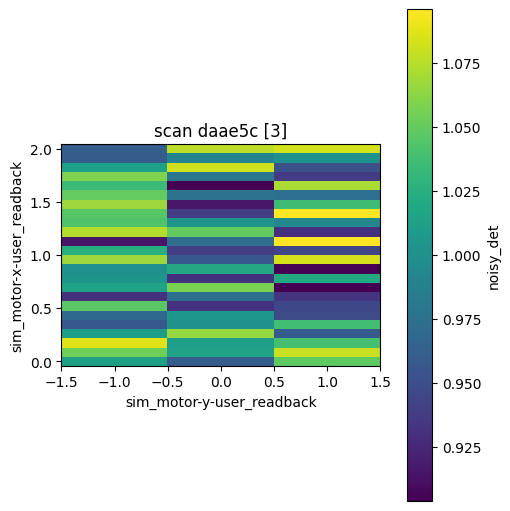

In [7]:
from collections import defaultdict

from bluesky.plan_stubs import mov

docs = defaultdict(list)

def capture_emitted(name, doc):
    docs[name].append(doc)

# Unknown step size
docs = defaultdict(list)
RE(mov(xyz_motor.x, 0, xyz_motor.y,0),bec)
RE(
    stxm_step(
        det=det,
        count_time=0.2,
        x_step_motor=xyz_motor.x,
        x_step_start=0,
        x_step_end=2,
        x_step_size=0.09,
        y_step_motor=xyz_motor.y,
        y_step_start=-1,
        y_step_end=1,
        y_step_size=1,
        home=True,
        snake=False,
    ),
    bec,
)


In [9]:
result = asyncio.gather(xyz_motor.x.user_readback.get_value(),xyz_motor.y.user_readback.get_value())

In [10]:
result

<_GatheringFuture finished result=[0, 0]>

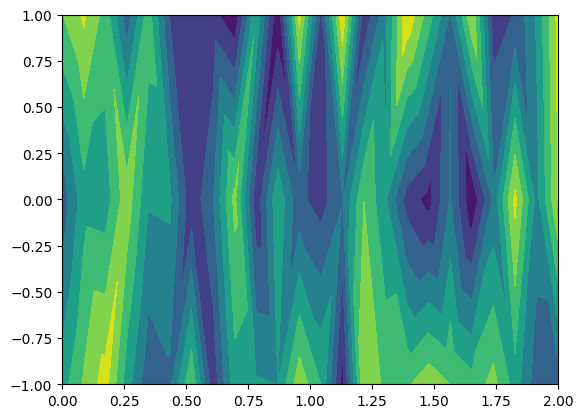

In [11]:
import matplotlib.pyplot as plt

header = db[-1]
data = header.table()
plt.tricontourf(data["sim_motor-x-user_readback"],data["sim_motor-y-user_readback"],data['noisy_det'])

2024-07-23 12:34:46,545 - P99 - INFO - Check sim_motor-y limits.
2024-07-23 12:34:46,546 - P99 - INFO - Check sim_motor-x limits.
2024-07-23 12:34:46,547 - P99 - INFO - ideal step size = 0.29139711855430966 velocity = 1.4569855927715483 number of data point 228.0
2024-07-23 12:34:46,548 - P99 - INFO -  step size = 0.29139711855430966, sim_motor-y: velocity = 1.4569855927715483, number of step = 16.


Transient Scan ID: 2     Time: 2024-07-23 12:34:46
Persistent Unique Scan ID: '3a3a0554-ea71-408a-981a-96df564c6c8e'
2024-07-23 12:34:46,550 - P99 - INFO - Check sim_motor-x limits.
2024-07-23 12:34:46,551 - P99 - INFO - Check sim_motor-y limits.
2024-07-23 12:34:50,964 - P99 - INFO - Starting 1d fly scan with sim_motor-y: start position = -2.2, end position(2.2).
2024-07-23 12:34:50,966 - P99 - INFO - flying motor =  sim_motor-y at speed =(1.4569855927715483)
New stream: 'primary'
+-----------+------------+------------+---------------------------+---------------------------+
|   seq_num |

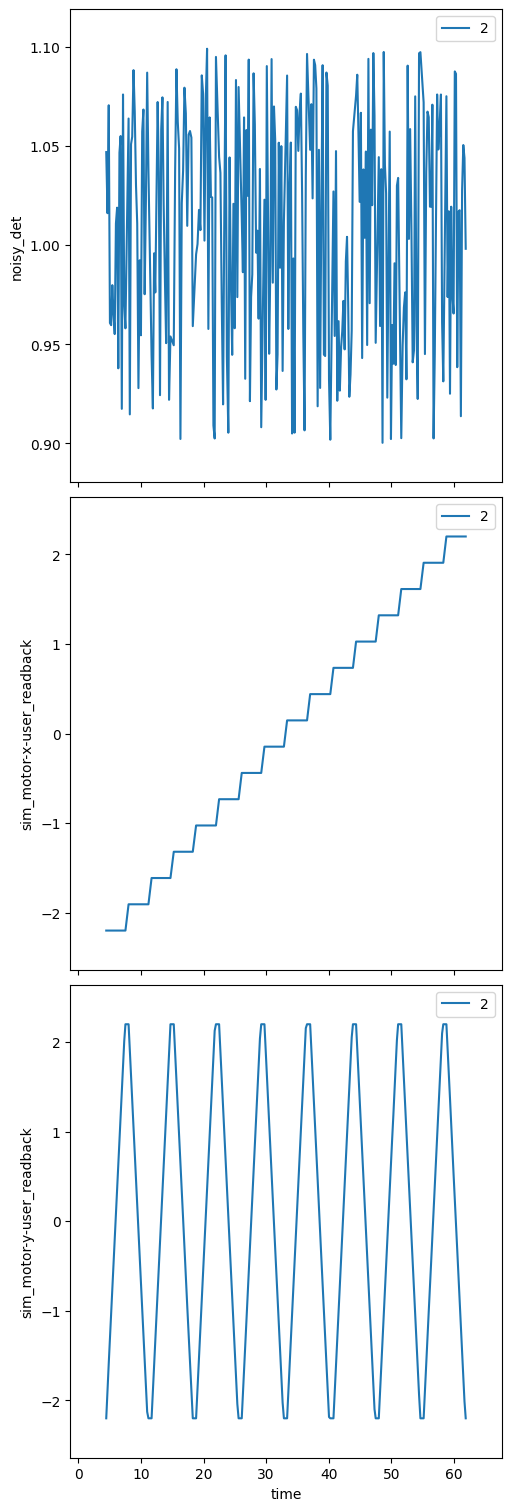

In [6]:
uid, = RE(stxm_fast(
    det=det,
    count_time = 0.2,
    step_motor = xyz_motor.x,
    step_start = -2.2,
    step_end   = 2.2,
    scan_motor = xyz_motor.y,
    scan_start = -2.2,
    scan_end   = 2.2,
    plan_time  = 50,
),bec)

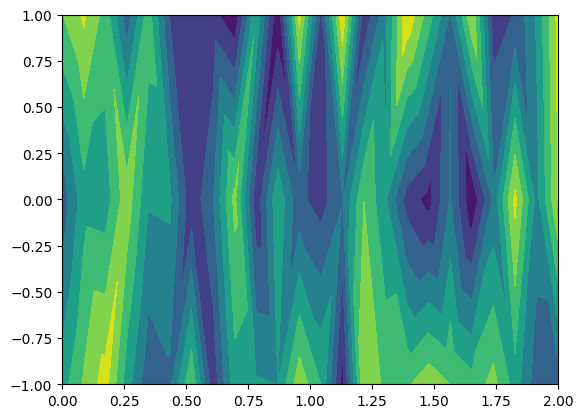

In [8]:
header = db[-1]
data = header.table()
plt.tricontourf(data["sim_motor-x-user_readback"],data["sim_motor-y-user_readback"],data['noisy_det'])

In [5]:
RE.stop()

Stopping: running cleanup and marking exit_status as 'success'...


('ece90874-e487-432e-8887-ca7e612af651',)